In [1]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import multiprocessing
from multiprocessing import Pool
import os
import pdf_to_txt
import seaborn as sns
cores = multiprocessing.cpu_count()
assert gensim.models.doc2vec.FAST_VERSION > -1

In [2]:
data = pdf_to_txt.final()
print("finished converting to txt")

D:/projects/ZInc/New folder/book_txt/ICICI_Home_ Loan_FAQ
D:/projects/ZInc/New folder/book_txt/PCB-design-basics
D:/projects/ZInc/New folder/book_txt/PRALAY
D:/projects/ZInc/New folder/book_txt/Raavan
D:/projects/ZInc/New folder/book_txt/Roll of the Dice
D:/projects/ZInc/New folder/book_txt/Scion of Ikshvaku
D:/projects/ZInc/New folder/book_txt/Sita An Illustrated Retelling of the Ramayana by Devdutt Pattanaik
D:/projects/ZInc/New folder/book_txt/Sita
D:/projects/ZInc/New folder/book_txt/The Immortals of Meluha
D:/projects/ZInc/New folder/book_txt/The Krishna Key
D:/projects/ZInc/New folder/book_txt/The Oath of the Vayuputras
D:/projects/ZInc/New folder/book_txt/The Secret of the Nagas
preprocessing
preprocessing
preprocessing
preprocessing
preprocessing
preprocessing
preprocessing
preprocessing
preprocessing
preprocessing
preprocessing
preprocessing
<class 'list'>
finished converting to txt


In [3]:
labels = os.listdir("D:/projects/ZInc/New folder/books")
book_data = []
books = os.listdir("D:/projects/ZInc/New folder/book_txt")
for book in books :
    with open("D:/projects/ZInc/New folder/book_txt/" + book ) as f:
        book_data.append(f.readlines)

In [13]:

#for i , _d in enumerate(data):
   # _d.split()
   # token_list = []
   # for token in _d:
   #     token_list.append(token)
    #tagged_data = TaggedDocument(words =word_tokenize(_d), tags=[str(i)])
tagged_data =  [TaggedDocument(words=word_tokenize(_d), tags=[str(i)]) for i, _d in enumerate(data)]


In [14]:
print(type(tagged_data))
with open("fie.txt" , "w") as f:
    for data in tagged_data:
        print(data)
        break
        print(type(data))
        f.writelines(data)
        f.writeline("__________________________________________________________________________________________________________________________________________________________________-")

<class 'list'>
TaggedDocument(['1frequentlyaskedquestionsfaqshomeloanclosehomeloanchargesprepayingloanprepaymentcharges1nilhomeloanshomeimprovementloansfloatingrateinterest22plusapplicabletaxesprincipaloutstandingfullrepaymenthomeloansfixedrateinterest32plusapplicabletaxesprincipaloutstandingfullrepaymenthomeloantoploanapplicantcoapplicantnonindividualplusapplicabletaxesprincipaloutstandingloangivennonindividualborrowersfixedrateinterestindividualborrowersloansanctionedpriormarch2011prepaymentchargeswouldplusapplicabletaxescurrentprincipaloutstandingamountstenderedborrowertowardsprepaymentfacilitylastoneyeardatefinalprepaymenthomeequityloanhomeequityenhancementloanofficepremisesloanleaserentaldiscountingloanmakepartprepaymenthomeloanaccount2nefticicibankyesicicibankacceptspartpaymenthomeloannationalelectronicfundstransferneftcasewantmakepartpaymenthomeloanaccountneftneedvisitnearesticicibankassetservicingbranchservicerequestnumberreceivedbranchmustmentionedremarkscolumnneftformmakingpa

In [15]:
simple_models = [
    # PV-DBOW plain
    Doc2Vec(dm=0, vector_size=100, negative=5, hs=0, min_count=2, sample=0, 
            epochs=20, workers=cores),
    # PV-DM w/ default averaging; a higher starting alpha may improve CBOW/PV-DM modes
    Doc2Vec(dm=1, vector_size=100, window=10, negative=5, hs=0, min_count=2, sample=0, 
            epochs=20, workers=cores, alpha=0.05, comment='alpha=0.05'),
    # PV-DM w/ concatenation - big, slow, experimental mode
    # window=5 (both sides) approximates paper's apparent 10-word total window size
    Doc2Vec(dm=1, dm_concat=1, vector_size=100, window=5, negative=5, hs=0, min_count=2, sample=0, 
            epochs=20, workers=cores),
]


for model in simple_models:
    model.build_vocab(tagged_data) 
    print("%s vocabulary scanned & state initialized" % model)
    
#models_by_name = OrderedDict((str(model), model) for model in simple_models)
#models_by_name['dbow+dmm'] = ConcatenatedDoc2Vec([simple_models[0], simple_models[1]])
#models_by_name['dbow+dmc'] = ConcatenatedDoc2Vec([simple_models[0], simple_models[2]])

Doc2Vec(dbow,d100,n5,mc2,t8) vocabulary scanned & state initialized
Doc2Vec("alpha=0.05",dm/m,d100,n5,w10,mc2,t8) vocabulary scanned & state initialized
Doc2Vec(dm/c,d100,n5,w5,mc2,t8) vocabulary scanned & state initialized


In [8]:
''''
#max_epochs = 100
#vec_size = 20
#alpha = 0.025
model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
print("biulding model")
model.build_vocab(tagged_data)

print("model training")
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

print("saving model")
model.save("d2v.model")
print("Model Saved")

print("loading saved model")
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("I love chatbots".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
#similar_doc = model.docvecs.most_similar('1')
#print(similar_doc)
'''

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print("dark thing ka vectors :")
print( model.docvecs[0])

dark thing ka vectors :
[-0.00023794 -0.00205186 -0.00017159  0.00235376 -0.00079174  0.000703
 -0.00231546  0.00382826  0.00278873  0.00073831  0.00105287 -0.00414373
 -0.00426359  0.00173406 -0.00237964 -0.00346691  0.00180839 -0.00081183
 -0.00375611 -0.00353242 -0.00385743 -0.00048714 -0.00288706 -0.00079636
  0.0042045   0.00312094 -0.00480337  0.00038783 -0.00282362 -0.00096651
 -0.00227    -0.00293459  0.000706   -0.00483542  0.00091877  0.00259089
  0.00221107  0.00208079  0.00391033  0.00261161  0.00268586  0.00093487
 -0.00173613 -0.00230469 -0.00191507  0.00277865 -0.00173593 -0.0046616
  0.0035397   0.00433089  0.0028411   0.00044005  0.00478334 -0.00270853
  0.00025199 -0.00486119 -0.00375389  0.00369147 -0.00448352  0.00408629
 -0.00265964 -0.00495759  0.0030758   0.00075873  0.00139824  0.00305071
 -0.00142781  0.00233499  0.00156522  0.00107559  0.00034655 -0.00488262
  0.00295751  0.00404484 -0.00172755 -0.00070128  0.00256612  0.00024379
 -0.00275635 -0.00079171 -0.00

[[ -60.312317  141.36963 ]
 [  60.31256  -141.36914 ]]
AxesSubplot(0.125,0.125;0.775x0.755)
[[ -60.312317  141.36963 ]
 [  60.31256  -141.36914 ]]
AxesSubplot(0.125,0.125;0.775x0.755)
[[ -60.312317  141.36963 ]
 [  60.31256  -141.36914 ]]
AxesSubplot(0.125,0.125;0.775x0.755)


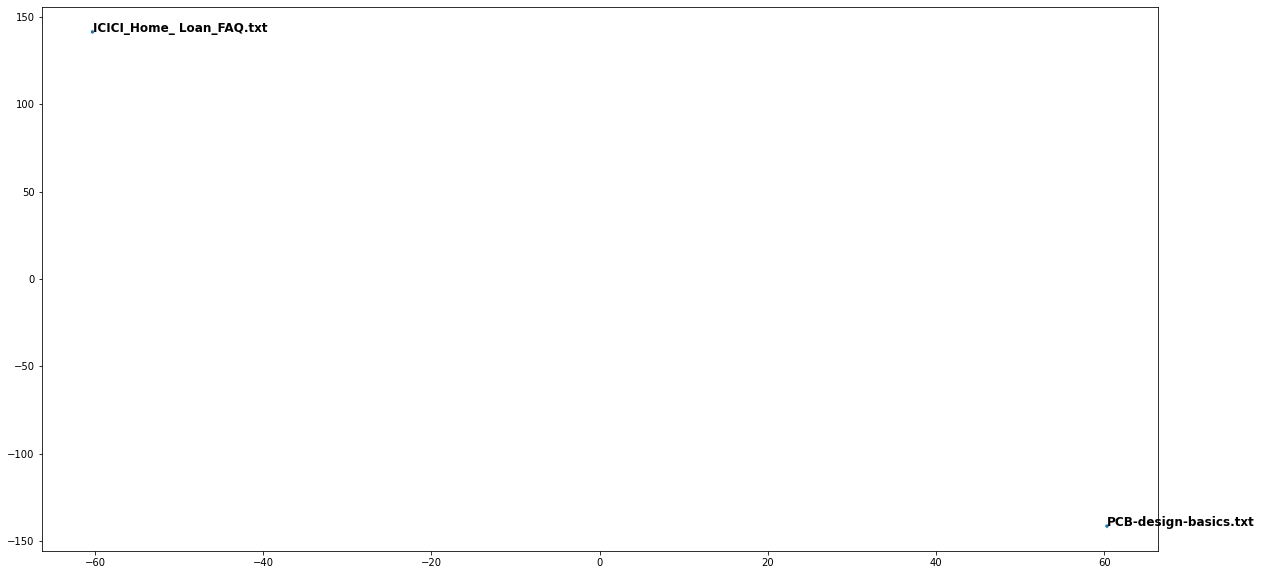

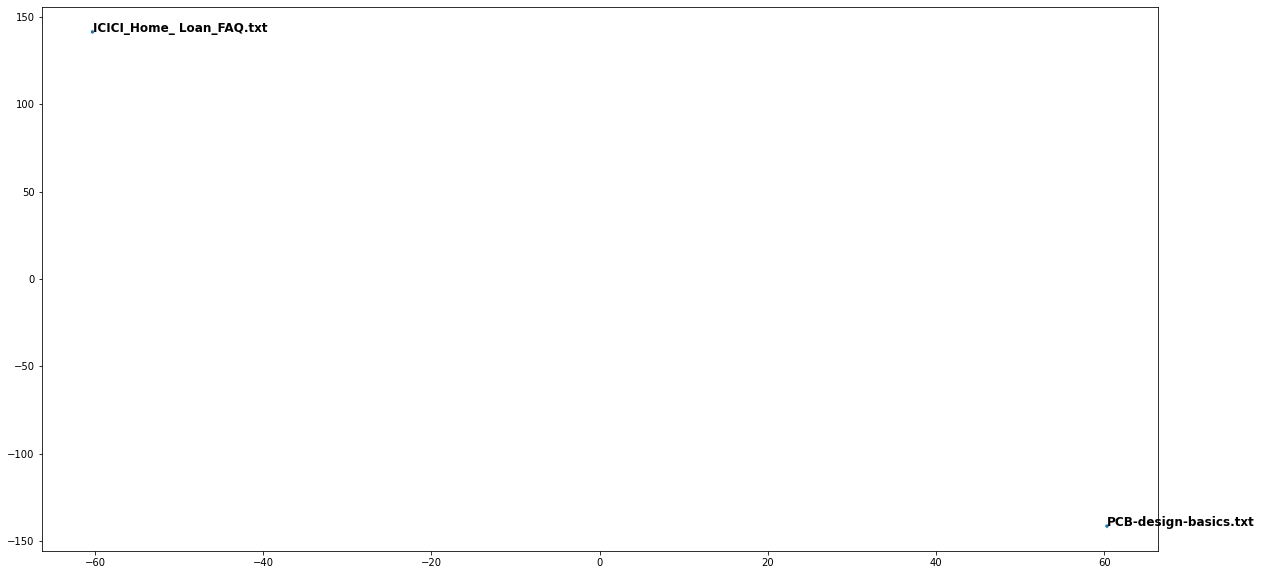

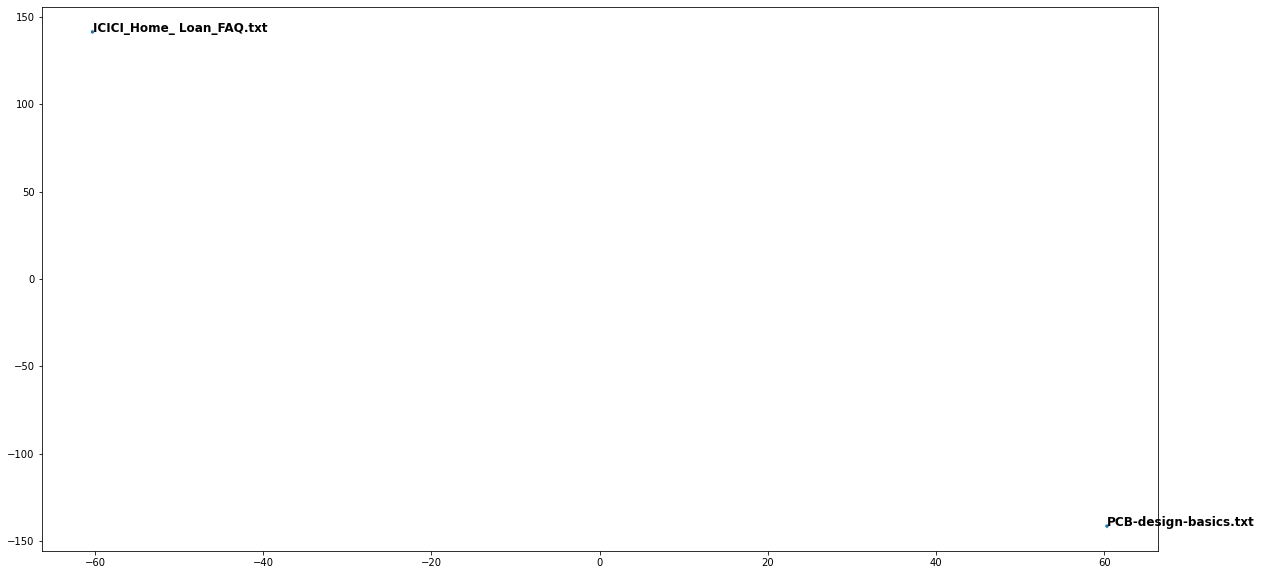

In [16]:
cout = 0
for model in simple_models:
    cout = cout + 1
    doc_embeddings = model.docvecs.vectors_docs
    
    tsne = TSNE(n_components=2, random_state=0)
    Y = tsne.fit_transform(doc_embeddings)
    print(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    labels = os.listdir("D:/projects/ZInc/New folder/book_txt")
    plt.figure(figsize=(20,10))

    ax = sns.scatterplot(x=x_coords, y=y_coords,size = 8, legend = False)
    for line in range(0,len(x_coords)):
        ax.text(x_coords[line] +0.01 , y_coords[line],labels[line],
         size='large', color='black', weight='semibold')


    fig = ax.get_figure()
    fig.savefig("plot_1" +str(cout))
    print(ax)